In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
link = 'https://raw.githubusercontent.com/sohaibbinmohsin/dm-project-boston-crime-analysis/main/Dataset.csv'
df = pd.read_csv(link, encoding = "ISO-8859-1", low_memory=False)

In [ ]:
df.head(10)

INCIDENT_NUMBER  OFFENSE_CODE OFFENSE_CODE_GROUP  \
0      I192068249          2647              Other   
1      I192061894          1106   Confidence Games   
2      I192038828          1107              Fraud   
3      I192008877          1107              Fraud   
4      I182090828          1102              Fraud   
5      I182090458          1107              Fraud   
6      I182081063          1107              Fraud   
7      I182074094          2629         Harassment   
8      I182066132          2629         Harassment   
9      I182061268          3201      Property Lost   

               OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0        THREATS TO DO BODILY HARM       B2            280      NaN   
1  FRAUD - CREDIT CARD / ATM FRAUD      C11            356      NaN   
2            FRAUD - IMPERSONATION       A1            172      NaN   
3            FRAUD - IMPERSONATION      E18            525      NaN   
4  FRAUD - FALSE PRETENSE / SCHEME       D4            159      NaN   
5            FRAUD - IMPERSONATION      C11            336      NaN   
6            FRAUD - IMPERSONATION      E18            478      NaN   
7                       HARASSMENT       B2            258      NaN   
8                       HARASSMENT       B3            455      NaN   
9                  PROPERTY - LOST      NaN                     NaN   

  OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR         STREET        Lat  \
0    8/28/15 10:20  2015      8      Friday    10  WASHINGTON ST  42.330119   
1     8/20/15 0:00  2015      8    Thursday     0     CHARLES ST  42.300605   
2    11/2/15 12:24  2015     11      Monday    12      ALBANY ST  42.334288   
3    7/31/15 10:00  2015      7      Friday    10     WINGATE RD  42.237009   
4    12/1/15 12:00  2015     12     Tuesday    12       UPTON ST  42.342432   
5     12/4/15 0:00  2015     12      Friday     0      NORTON ST  42.306265   
6    12/1/15 12:25  2015     12     Tuesday    12  RUSKINDALE RD  42.268897   
7     9/14/15 9:31  2015      9      Monday     9    COLUMBIA RD  42.315142   
8    7/31/15 23:27  2015      7      Friday    23   RADCLIFFE ST  42.300202   
9     6/15/15 0:00  2015      6      Monday     0        BERNARD  -1.000000   

        Long                     Location  
0 -71.084251  (42.33011862, -71.08425106)  
1 -71.061268  (42.30060543, -71.06126785)  
2 -71.072395  (42.33428841, -71.07239518)  
3 -71.129566  (42.23700950, -71.12956606)  
4 -71.072258  (42.34243222, -71.07225766)  
5 -71.068646  (42.30626521, -71.06864556)  
6 -71.108137  (42.26889666, -71.10813750)  
7 -71.067047  (42.31514179, -71.06704709)  
8 -71.078354  (42.30020194, -71.07835353)  
9  -1.000000   (-1.00000000, -1.00000000)

In [ ]:
df.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

In [ ]:
df.describe()

OFFENSE_CODE           YEAR          MONTH           HOUR  \
count  567623.000000  567623.000000  567623.000000  567623.000000   
mean     2333.235131    2017.965038       6.624245      13.024004   
std      1195.613580       1.897510       3.333956       6.333570   
min       100.000000    2015.000000       1.000000       0.000000   
25%      1102.000000    2016.000000       4.000000       9.000000   
50%      3005.000000    2018.000000       7.000000      14.000000   
75%      3201.000000    2020.000000       9.000000      18.000000   
max     99999.000000    2022.000000      12.000000      23.000000   

                 Lat          Long  
count  545093.000000  5.450930e+05  
mean       36.494844 -6.129973e+01  
std        14.585577  2.448707e+01  
min        -1.000000 -7.117867e+01  
25%        42.284070 -7.109272e+01  
50%        42.316617 -7.107240e+01  
75%        42.344513 -7.105576e+01  
max        42.395042  5.250000e-08

# Missing Values

In [ ]:
num_rows = df.shape[0]
print('number of records: ',num_rows)
num_cols = df.shape[1]
print('number of attributes: ',num_cols)

number of records:  567623
number of attributes:  16


## Number of missing values

In [ ]:
print('Number of missing values:\n',df.isna().sum())
print('Total missing values: ',df.isna().sum().sum())

Number of missing values:
 INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP     214370
OFFENSE_DESCRIPTION         0
DISTRICT                 3421
REPORTING_AREA              0
SHOOTING               351798
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
STREET                  11886
Lat                     22530
Long                    22530
Location                    0
dtype: int64
Total missing values:  626535


In [ ]:
df['SHOOTING']= df['SHOOTING'].fillna(0)
df['REPORTING_AREA'].isna().sum()

0

In [ ]:
df.dropna(subset=['Lat', 'Long', 'DISTRICT'], inplace=True)
df = df.bfill(axis ='columns')

In [ ]:
df.shape

(541990, 16)

In [ ]:
df.tail()

INCIDENT_NUMBER OFFENSE_CODE  \
567618       222004519          617   
567619       222004517          520   
567620       222004516         3126   
567621       122004001         3115   
567622       149210376         3126   

                                OFFENSE_CODE_GROUP  \
567618                 LARCENY THEFT FROM BUILDING   
567619                      BURGLARY - RESIDENTIAL   
567620  WARRANT ARREST - OUTSIDE OF BOSTON WARRANT   
567621                          INVESTIGATE PERSON   
567622  WARRANT ARREST - OUTSIDE OF BOSTON WARRANT   

                               OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA  \
567618                 LARCENY THEFT FROM BUILDING       A1                  
567619                      BURGLARY - RESIDENTIAL       D4                  
567620  WARRANT ARREST - OUTSIDE OF BOSTON WARRANT       D4            167   
567621                          INVESTIGATE PERSON      E13            912   
567622  WARRANT ARREST - OUTSIDE OF BOSTON WARRANT       B2                  

       SHOOTING OCCURRED_ON_DATE  YEAR MONTH DAY_OF_WEEK HOUR  \
567618        0     1/21/22 8:05  2022     1      Friday    8   
567619        0     1/21/22 7:01  2022     1      Friday    7   
567620        0     1/21/22 7:25  2022     1      Friday    7   
567621        0     1/19/22 9:30  2022     1   Wednesday    9   
567622        0      1/2/22 0:00  2022     1      Sunday    0   

                                                   STREET      Lat      Long  \
567618                                       ARLINGTON ST      0.0       0.0   
567619                                      WASHINGTON ST      0.0       0.0   
567620                                       HARRISON AVE      0.0       0.0   
567621                                           HEATH ST      0.0       0.0   
567622  WASHINGTON ST & ROXBURY ST\nBOSTON  MA 02119\n...  42.3296 -71.08462   

                                       Location  
567618                                   (0, 0)  
567619                                   (0, 0)  
567620                                   (0, 0)  
567621                                   (0, 0)  
567622  (42.32959998129787, -71.08462000476281)

In [ ]:
print('test for NAN after filling the missing values: ',df.isnull().values.any() )


test for NAN after filling the missing values:  False


In [ ]:
df.OFFENSE_CODE_GROUP.unique()

array(['Other', 'Confidence Games', 'Fraud', 'Harassment',
       'Criminal Harassment', 'Larceny', 'Property Lost',
       'Auto Theft Recovery', 'Larceny From Motor Vehicle',
       'Investigate Person', 'Police Service Incidents',
       'Warrant Arrests', 'Auto Theft', 'Restraining Order Violations',
       'Property Found', 'Robbery', 'Firearm Violations',
       'Medical Assistance', 'Simple Assault', 'Missing Person Located',
       'Missing Person Reported', 'Embezzlement',
       'Motor Vehicle Accident Response', 'Residential Burglary',
       'Counterfeiting', 'Prisoner Related Incidents', 'Vandalism',
       'Investigate Property', 'License Plate Related Incidents',
       'Aggravated Assault', 'Offenses Against Child / Family',
       'Firearm Discovery', 'Verbal Disputes', 'Search Warrants',
       'Violations', 'Landlord/Tenant Disputes', 'Commercial Burglary',
       'Evading Fare', 'Towed', 'Other Burglary', 'License Violation',
       'Drug Violation', 'Fire Related R

In [ ]:
import folium
from folium import Marker
m_2 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=12)

daytime_robberies = df[((df.OFFENSE_CODE_GROUP == 'Robbery') & (df.HOUR.isin(range(9,18))))]
# Add points to the map
for idx, row in daytime_robberies.iterrows():
    Marker([row['Lat'], row['Long']], popup=row['DISTRICT']).add_to(m_2)

# Display the map
m_2

In [ ]:
import folium
from folium import Marker
m_3 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=12)

drunk = df[(df.OFFENSE_CODE_GROUP == 'DRUNKENNESS')]
# Add points to the map
for idx, row in drunk.iterrows():
    Marker([row['Lat'], row['Long']], popup=row['DISTRICT']).add_to(m_3)

# Display the map
m_3

In [ ]:
m_4 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=12)

Harr = df[(df.OFFENSE_CODE_GROUP == 'Harassment')]
# Add points to the map
for idx, row in Harr.iterrows():
    Marker([row['Lat'], row['Long']]).add_to(m_4)

# Display the map
m_4

## Changing types of attributes

In [ ]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
columns = ['INCIDENT_NUMBER', 'OFFENSE_CODE_GROUP', 'DISTRICT', 'SHOOTING', 'OCCURRED_ON_DATE', 'DAY_OF_WEEK', 'Location', 'STREET']
for c,col in enumerate(columns):
    labels = gle.fit_transform(df[col].astype(str))
    df[col] = labels
df.head()

INCIDENT_NUMBER OFFENSE_CODE  OFFENSE_CODE_GROUP  \
0           437999         2647                 133   
1           432189         1106                 247   
2           410464         1107                  14   
3           382241         1107                  14   
4           361918         1102                  14   

               OFFENSE_DESCRIPTION  DISTRICT REPORTING_AREA  SHOOTING  \
0        THREATS TO DO BODILY HARM         6            280         0   
1  FRAUD - CREDIT CARD / ATM FRAUD         8            356         0   
2            FRAUD - IMPERSONATION         0            172         0   
3            FRAUD - IMPERSONATION         2            525         0   
4  FRAUD - FALSE PRETENSE / SCHEME        11            159         0   

   OCCURRED_ON_DATE  YEAR MONTH  DAY_OF_WEEK HOUR  STREET        Lat  \
0            287775  2015     8            0   10    2610  42.330119   
1            275894  2015     8            4    0    5975  42.300605   
2            392471  2015    11            1   12    3691  42.334288   
3            248106  2015     7            0   10    3362  42.237009   
4               179  2015    12            5   12    2062  42.342432   

        Long  Location  
0 -71.084251     16151  
1 -71.061268      4377  
2 -71.072395     18511  
3 -71.129566      2447  
4 -71.072258     22398

# Correlation

## Pearson Method

In [ ]:
pcorr = df.corr(method='pearson')
print(pcorr)

                    INCIDENT_NUMBER  OFFENSE_CODE_GROUP  DISTRICT  SHOOTING  \
INCIDENT_NUMBER            1.000000           -0.035080 -0.000502  0.005544   
OFFENSE_CODE_GROUP        -0.035080            1.000000  0.000846 -0.017243   
DISTRICT                  -0.000502            0.000846  1.000000  0.007623   
SHOOTING                   0.005544           -0.017243  0.007623  1.000000   
OCCURRED_ON_DATE          -0.071468           -0.005393 -0.002008  0.002724   
DAY_OF_WEEK                0.001444            0.003476  0.003925 -0.002974   
STREET                     0.004485           -0.000509  0.035064 -0.003109   
Location                  -0.204209            0.000389 -0.202385 -0.020227   

                    OCCURRED_ON_DATE  DAY_OF_WEEK    STREET  Location  
INCIDENT_NUMBER            -0.071468     0.001444  0.004485 -0.204209  
OFFENSE_CODE_GROUP         -0.005393     0.003476 -0.000509  0.000389  
DISTRICT                   -0.002008     0.003925  0.035064 -0.202385  


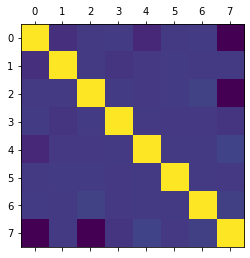

In [ ]:
plt.matshow(pcorr)
plt.show()

## Kendall Method

In [ ]:
kcorr = df.corr(method='kendall')
print(kcorr)

                    INCIDENT_NUMBER  OFFENSE_CODE_GROUP  DISTRICT  SHOOTING  \
INCIDENT_NUMBER            1.000000           -0.028901  0.000345  0.011805   
OFFENSE_CODE_GROUP        -0.028901            1.000000 -0.002290 -0.016327   
DISTRICT                   0.000345           -0.002290  1.000000 -0.002069   
SHOOTING                   0.011805           -0.016327 -0.002069  1.000000   
OCCURRED_ON_DATE          -0.013665           -0.002947 -0.000490  0.001863   
DAY_OF_WEEK                0.001053            0.001727  0.002270 -0.002449   
STREET                     0.002955            0.000127  0.024361 -0.000807   
Location                  -0.152945            0.004905 -0.098287 -0.021427   

                    OCCURRED_ON_DATE  DAY_OF_WEEK    STREET  Location  
INCIDENT_NUMBER            -0.013665     0.001053  0.002955 -0.152945  
OFFENSE_CODE_GROUP         -0.002947     0.001727  0.000127  0.004905  
DISTRICT                   -0.000490     0.002270  0.024361 -0.098287  


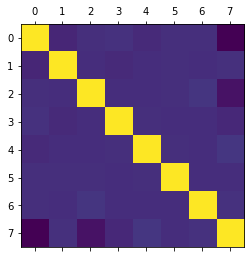

In [ ]:
plt.matshow(kcorr)
plt.show()

# Most Frequently Occuring Incident

In [ ]:
print(df['OFFENSE_CODE'].value_counts())

3115    36406
3006    29493
3831    27947
1402    25470
3114    21427
        ...  
315         1
112         1
1105        1
2500        1
122         1
Name: OFFENSE_CODE, Length: 252, dtype: int64


From above, we can see that incident with offense code 3115 occured most. So, now we will find out its description.

In [ ]:
ind = df.index[df['OFFENSE_CODE'] == 3115].tolist()
offense_desc = list()

for i in ind:
  offense_desc.append(df['OFFENSE_DESCRIPTION'][i])
print('Most occuring incidents is: ', set(offense_desc))

Most occuring incidents is:  {'INVESTIGATE PERSON'}


# District Wise Analysis

In [ ]:
district_incident_table = (df['DISTRICT'].value_counts()).to_frame()
district_incident_table.columns = ['Incidents']
district_incident_table.index.name = 'District'
district_incident_table

Incidents
District           
B2            87461
C11           75149
D4            73402
B3            63335
A1            62367
C6            42396
D14           36743
E18           31529
E13           31350
E5            24673
A7            23643
A15           11762
External        392

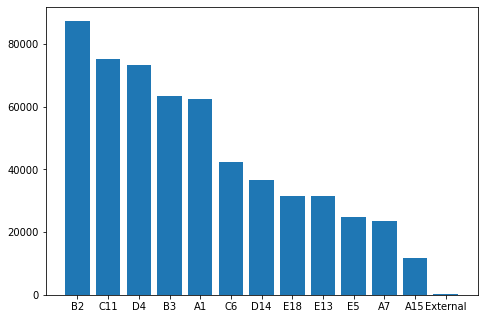

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(district_incident_table.index,district_incident_table['Incidents'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


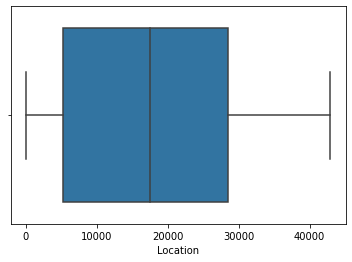

In [ ]:
#sns.boxplot(df['YEAR'])
sns.boxplot(df['Location'])
